# Housing Project

**Author:** Ron Lodetti Jr.
***

# Overview


A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.
***
[Need To Do]

# Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

What are the business's pain points related to this project?
How did you pick the data analysis question(s) that you did?
Why are these questions important from a business perspective?

***
A new startup is developing an app to help consumers find the best deals on home purchases. The company would like to beta test in King County, Washington before expanding into other markets. My task is to analyze the housing data to best determine what features of a property best predict the sale price. The company will use this information to recommendation properties to customers which are priced below the model's prediction.

# Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

[On it's own page]

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Loading the datasets.
orig_df = pd.read_csv('data/original.csv')
res = pd.read_csv('data/residential.csv', low_memory=False)
parcel = pd.read_csv('data/parcel.csv', low_memory=False)
sales = pd.read_csv('data/sales.csv', low_memory=False)
ods = pd.read_csv('data/open_datasoft.csv')
pd.set_option("mode.chained_assignment", None)

### Original Dataset
For this project I used the dataset provided by the Flatiron School which comes from [King County Assessor Data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) 

Here are the variables I used, including their descriptions:
* **id** - Unique identifier for a house
* **date** - Date house was sold
* **price** - Sale price (prediction target)
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms
* **sqft_living** - Square footage of living space in the home
* **sqft_lot** - Square footage of the lot
* **floors** - Number of floors (levels) in house
* **waterfront** - Whether the house is on a waterfront
* **greenbelt** - Whether the house is adjacent to a green belt
* **nuisance** - Whether the house has traffic noise or other recorded nuisances
* **view** - Quality of view from house
* **condition** - How good the overall condition of the house is. Related to maintenance of house.
* **grade** - Overall grade of the house. Related to the construction and design of the house.
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year when house was built
* **yr_renovated** - Year when house was renovated
* **address** - The street address

In [3]:
orig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  sqft_basement  30155 non-null  int64  
 15  yr_built       30155 non-null  int64  
 16  yr_renovated   30155 non-null  int64  
 17  address        30155 non-null  object 
dtypes: flo

In [4]:
orig_df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_basement,yr_built,yr_renovated,address
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,0,1969,0,"2102 Southeast 21st Court, Renton, Washington ..."
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,1570,1950,0,"11231 Greenwood Avenue North, Seattle, Washing..."
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,1580,1956,0,"8504 South 113th Street, Seattle, Washington 9..."


### Additional Datasets
I also incorporated additional datasets from [King County Assessor Data](https://info.kingcounty.gov/assessor/DataDownload/default.aspx): 
* Residential Building
* Parcel
* Real Property Sales

Each of these datasets includes a `Major` and `Minor` column which have six and four characters respectively and may have leading zeros. When concatenated they create a unique `id` which will be used for merging.

In [5]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524552 entries, 0 to 524551
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Major            524552 non-null  int64  
 1   Minor            524552 non-null  int64  
 2   ZipCode          472502 non-null  object 
 3   Stories          524552 non-null  float64
 4   BldgGrade        524552 non-null  int64  
 5   SqFtTotLiving    524552 non-null  int64  
 6   SqFtTotBasement  524552 non-null  int64  
 7   SqFtFinBasement  524552 non-null  int64  
 8   Bedrooms         524552 non-null  int64  
 9   BathFullCount    524552 non-null  int64  
 10  YrBuilt          524552 non-null  int64  
 11  YrRenovated      524552 non-null  int64  
 12  Condition        524552 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 52.0+ MB


In [6]:
res.head(3)

,Major,Minor,ZipCode,Stories,BldgGrade,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,Bedrooms,BathFullCount,YrBuilt,YrRenovated,Condition
0,12603,9624,98133,1.0,8,1810,720,420,3,2,1982,0,3
1,12603,9625,98177,1.5,7,4340,2320,1740,3,2,1994,0,3
2,12603,9628,98133,1.0,7,1800,660,660,4,1,1982,0,3


In [7]:
parcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622667 entries, 0 to 622666
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Major                622667 non-null  int64 
 1   Minor                622667 non-null  int64 
 2   PropType             622667 non-null  object
 3   SqFtLot              622667 non-null  int64 
 4   MtRainier            622667 non-null  int64 
 5   Olympics             622667 non-null  int64 
 6   Cascades             622667 non-null  int64 
 7   Territorial          622667 non-null  int64 
 8   SeattleSkyline       622667 non-null  int64 
 9   PugetSound           622667 non-null  int64 
 10  LakeWashington       622667 non-null  int64 
 11  LakeSammamish        622667 non-null  int64 
 12  SmallLakeRiverCreek  622667 non-null  int64 
 13  OtherView            622667 non-null  int64 
 14  WfntLocation         622667 non-null  int64 
 15  TrafficNoise         622667 non-nu

In [8]:
parcel.head(3)

,Major,Minor,PropType,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,AdjacentGreenbelt
0,714760,85,R,16693,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,N
1,739920,210,R,8686,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,N
2,510140,8598,R,6434,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,N


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281280 entries, 0 to 2281279
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Major         object
 1   Minor         object
 2   DocumentDate  object
 3   SalePrice     int64 
 4   PrincipalUse  int64 
dtypes: int64(2), object(3)
memory usage: 87.0+ MB


In [10]:
sales.head(3)

,Major,Minor,DocumentDate,SalePrice,PrincipalUse
0,004000,0228,04/29/1997,103500,0
1,799671,0190,06/26/2019,0,6
2,327620,0100,09/01/2020,430000,6


Lastly, I used a dataset from [OpenDataSoft](https://data.opendatasoft.com/) to gather information about King County zip codes. This included:

* **Zip Code** - The 5-digit zip code assigned by the U.S. Postal Service. Only includes zip codes in King County, WA.
* **Population** - An estimate of the zip code's population.
* **Density** - The estimated population per square kilometer.  

In [11]:
ods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zip Code    87 non-null     int64  
 1   Population  87 non-null     float64
 2   Density     87 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.2 KB


In [12]:
ods.head(3)

,Zip Code,Population,Density
0,98029,29250.0,1261.5
1,98070,10291.0,107.6
2,98074,28775.0,1041.4


# Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***
**Handling Missing Values**: Missing values may be present in the features you want to use, either encoded as NaN or as some other value such as "?". Before you can build a linear regression model, make sure you identify and address any missing values using techniques such as dropping or replacing data.

**Handling Non-Numeric Data**: A linear regression model needs all of the features to be numeric, not categorical. For this project, be sure to pick at least one non-numeric feature and try including it in a model. You can identify that a feature is currently non-numeric if the type is object when you run .info() on your dataframe. Once you have identified the non-numeric features, address them using techniques such as ordinal or one-hot (dummy) encoding.

In [13]:
# Importing code module which include functions to clean data.
from code import data_prep as dp

### Before Merging
To prepare the datasets for merging, I:
- Made an `id` column out of the `Major` and `Minor` columns to create a primary key for merging.
- Extracted, cleaned, and filtered zip code information to be sure they are all in the same format and only include zip codes from King County.
- Standardized elements in categorical variables by renaming them to discrete numeric predictors. For example, renaming a "Yes/No" to 1's and 0's.
- Identifying duplicated `id` and in most cases dropping them as they represented only a small proportion of the data sets. In the `sales` dataset duplicates represented multiple transactions of the same property, so I only included the most recent transaction.
- Filtered data to only include properties labeled as Condominium or Residential in the parcel dataset.
- Filtered data to only include properties labeled condominiums, apartments, residential buildings, and mobile homes in the `sales` dataset.
- Extracted the year_sold from the `sales` data and filtered it to include sales since 2021 to account for only recent data when making the model.
- Standardized column names for merging.

In [14]:
# Applying functions to clean and view the datasets.
orig_clean = dp.original_prep(orig_df,ods)
orig_clean.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode
id,,,,,,,,,,,,,,,,
7399300360,675000.0,4,1.0,1180,7140,1.0,0,0,0,0,4,7,0,1969,0,98055
8910500230,920000.0,5,2.5,2770,6703,1.0,0,0,1,3,3,7,1570,1950,0,98133
1180000275,311000.0,6,2.0,2880,6156,1.0,0,0,0,3,3,7,1580,1956,0,98178


In [15]:
res_clean = dp.res_prep(res,ods)
res_clean.head(3)

,bathrooms,bedrooms,condition,floors,grade,sqft_basement,sqft_living,yr_built,yr_renovated,zipcode
id,,,,,,,,,,
0126039624,2,3,3,1.0,8,720,1810,1982,0,98133.0
0126039625,2,3,3,1.5,7,2320,4340,1994,0,98177.0
0126039628,1,4,3,1.0,7,660,1800,1982,0,98133.0


In [16]:
parcel_clean = dp.parcel_prep(parcel)
parcel_clean.head(3)

,greenbelt,nuisance,sqft_lot,view,waterfront
id,,,,,
7147600085,0,0,16693,0,0.0
7399200210,0,0,8686,0,0.0
5101408598,0,0,6434,0,0.0


In [17]:
sales_clean = dp.sales_prep(sales)
sales_clean.head(3)

,date,price
id,,
0001000035,2021-08-18,0
0001000055,2021-10-20,248448
0001000061,2021-03-24,475000


In [18]:
ods_clean = dp.ods_prep(ods)
ods_clean.head(3)

,zipcode,population,density
0,98029,29250.0,1261.5
1,98070,10291.0,107.6
2,98074,28775.0,1041.4


### After Merging
After combining the data into a single dataframe, I:
- Cleaned columns to only include reasonable data. For example, including dropping any rows where `price` was equal to or less than 0. 
- Created a new column, `yr_last_construction`, which took the year from `yr_renovated` if renovated and `yr_built` if not. 
- Removed any rows with a `zipcode` count of less than or equal to 20 as they would be too small to count as a sample. 
- Removed any outliers. This made sense as extreme values could bias the statistics and are unlikely.
- Created new columns with all numerical variables normalized to be used for modeling.

In [19]:
# Merging, cleaning, and filtering the data. Converting zipcode to object type.
df = dp.merge_prep(sales_clean, orig_clean, res_clean, parcel_clean, ods_clean)
df['zipcode'] = df['zipcode'].astype(str)
df.iloc[:5,:15]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_basement,floors,grade,population,density,bedrooms_norm,bathrooms_norm,view,waterfront,greenbelt
id,,,,,,,,,,,,,,,
0001000055,248448,3,1,1790,39808,0,1,7,33468,1797,-0.453928,-0.833086,0,0,0
0001000061,475000,3,1,1870,9500,0,1,8,33468,1797,-0.453928,-0.833086,0,0,0
0001000070,610000,3,1,1790,19088,0,1,8,33468,1797,-0.453928,-0.833086,0,0,0
0001000094,609000,4,1,2232,12866,0,1,7,33468,1797,0.663952,-0.833086,0,0,0
0001000095,300000,2,1,960,7380,470,1,7,33468,1797,-1.571808,-0.833086,0,0,0


In [20]:
df.iloc[:5,15:]

,nuisance,condition,yr_built,yr_renovated,zipcode,yr_last_construction,sqft_living_norm,sqft_lot_norm,sqft_basement_norm,floors_norm,grade_norm,population_norm,density_norm,view_norm
id,,,,,,,,,,,,,,
0001000055,0,4,1958,0,98002,1958,-0.302742,4.548251,-0.864438,-0.79588,-0.544432,-0.116293,-0.135439,-0.334298
0001000061,0,5,1958,0,98002,1958,-0.207088,0.107864,-0.864438,-0.79588,0.402231,-0.116293,-0.135439,-0.334298
0001000070,0,4,1958,0,98002,1958,-0.302742,1.512590,-0.864438,-0.79588,0.402231,-0.116293,-0.135439,-0.334298
0001000094,0,4,1934,0,98002,1934,0.225751,0.601013,-0.864438,-0.79588,-0.544432,-0.116293,-0.135439,-0.334298
0001000095,0,4,1914,0,98002,1914,-1.295162,-0.202734,-0.023195,-0.79588,-0.544432,-0.116293,-0.135439,-0.334298


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47579 entries, 0001000055 to 9906000065
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 47579 non-null  int64  
 1   bedrooms              47579 non-null  int64  
 2   bathrooms             47579 non-null  int64  
 3   sqft_living           47579 non-null  int64  
 4   sqft_lot              47579 non-null  int64  
 5   sqft_basement         47579 non-null  int64  
 6   floors                47579 non-null  int64  
 7   grade                 47579 non-null  int64  
 8   population            47579 non-null  int64  
 9   density               47579 non-null  int64  
 10  bedrooms_norm         47579 non-null  float64
 11  bathrooms_norm        47579 non-null  float64
 12  view                  47579 non-null  int64  
 13  waterfront            47579 non-null  int64  
 14  greenbelt             47579 non-null  int64  
 15  nuisance  

# Data Modeling

Describe and justify the process for analyzing or modeling the data.
***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***
**Rationale**: Explaining why you are using statistical analyses rather than basic data analysis./n
* For example, why are you using regression coefficients rather than just a graph?
* What about the problem or data is suitable for this form of analysis?
* For a data science audience, this includes your reasoning for the changes you applied while iterating between models.

**Results**: Describing the overall model metrics and feature coefficients
You need at least one overall model metric (e.g. r-squared or RMSE) and at least two feature coefficients./n

For a business audience, make sure you connect any metrics to real-world implications. You do not need to get into the details of how linear regression works.
For a data science audience, you don't need to explain what a metric is, but make sure you explain why you chose that particular one.

### Initial Feature Selection
To begin deciding what features to include in my model, I looked at how each variable correlated with `price`.

In [ ]:
[corr series]

I then created a pairplot for the continuous variables and box plots for the discrete variables. 

In [ ]:
[pair]

In [ ]:
[box]

Based on this, the most promising features are `sqft_living`, `grade`, `bathrooms`, `bedrooms`, `view`, `sqft_basement`, `waterfront` and `greenbelt`. I also decided to include `zipcode`, to account for changes in price based on location of the property.

Before proceding with the model, I created a heatmap to check for multicollinerity between the predictors. 

In [ ]:
[heatmap]

Since `grade` and `sqft_living` have a correlation of greater than 0.7, I had to choose between the two of them. I decided to omit `grade` as it had a slightly lower correlation with `price`

### Baseline Model
Since `sqft_living` is the feature with the strongest correlation, I will use this for my baseline model. 

In [ ]:
[baseline]

Overall this model is statistically significant and explains about 42% of the variance in price. In a typical prediction, the model is off by about \\$305k.

The intercept is at about \\$145,700. This means that a house with the zero square footage of living space in the home would sell for \\\$145,700.
The coefficient for `sqft_living` is about \\$423. This means for each increase of 1 square foot of living space in the home, we see an associated increase of about \\$423.

### Recursive Feature Elimination
To begin my model iteration, I will include all of the relevant features. Then I will remove one feature at a time starting with any feature with a p-value larger than 0.05. Then I will remove the feature with the smallest absolute coefficient as that means it has the least effect of `price`. I will use the adjusted R-squared value, Mean Absolute Error, and Conditional Number to judge the model and help me decide when to stop removing features. I have also normalized each numeric feature to make it easier to compare their coefficients. 

In [ ]:
[first model of iteration]

In [ ]:
[iteration df]

### Final Model
To begin my model iteration

In [ ]:
[final model]

Overall this model is statistically significant and explains about 72% of the variance in price, a large improvement over the original 42%. The Mean Absolute Error has also improved from \\$305k to \\$197k.

The intercept is at about \\$865,700. This represents the predicted price of a property with the average square footage of living space, not on a waterfront, and in a King County zip code not included in our model. 

The coefficient for `sqft_living_norm` is about \\$292,100. This means for each increase of 1 standard deviation of square foot of living space in the home, we see an associated increase of about \\$292,100. Since the standard deviation of `sqft_living` is about 836, for every increase of 1 square foot of living space, we can expect and increase of about \\$349 in sale price. 

The coefficient for `waterfront` is about \\$480,200, which means we can expect a home on a waterfront to have an increase in sales price of \\$480,200. 

Since we have 65 `zipcode` features, it would be more helpful describe their overall shape than to go one by one. Each `zipcode` coefficient represents the predicted change in sale price for properties located within that zip code.

All of the coefficients are statistically significant.

In [22]:
zips = final_results.params[3:]
zips.describe()

count    6.500000e+01
mean     1.859279e+05
std      3.895975e+05
min     -2.771441e+05
25%     -1.688362e+05
50%      1.865456e+05
75%      4.488674e+05
max      1.711924e+06
dtype: float64

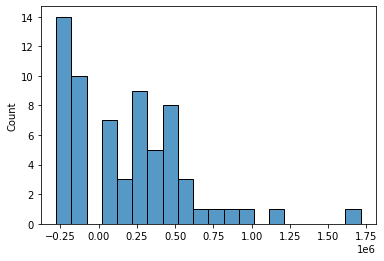

In [26]:
sns.histplot(zips, bins = 20);

The distribution of the zip codes skews right, with with most zip codes changing the sale price from about -\\$250,000 to \\$500,000 and a handfull of zip codes that raise the price of a home significantly up to \\$1,711,924.

# Evaluation

Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

# Conclusion

Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***

## Limitations

Identifying the limitations and/or uncertainty present in your analysis
This could include p-values/alpha values, confidence intervals, assumptions of linear regression, missing data, etc.
In general, this should be more in-depth for a data science audience and more surface-level for a business audience.
***
- Residuals still not normally distributed despite log transforming.
- The resituals are also heterodastic indicating ohter variables affecting the data
not linear either.
- Using data from housing sales and not apprasals. 
- The housing market is also affected by many things other than properties of the house, such as interest rates. 

## Recommendations


Interpreting the model results and limitations in the context of the business problem
What should stakeholders do with this information?
***
Using square footage, waterfront location, and zip code, we can roughly predict housing prices and thus recommend properties which are priced lower than our model would have predicted.